# Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
#import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections
from pd_replicator import replicator

from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

# from allennlp_models.pretrained import load_predictor
# predictor = load_predictor("roberta-sst")
# predictor = load_predictor("glove-sst")

# from transformers import pipeline 
# MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# #semtiment_pipeline = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')
# semtiment_pipeline = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.stem import PorterStemmer
ps = PorterStemmer()

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import inflect
m = inflect.engine()
from lemminflect import getInflection

from scipy.special import kl_div

import pysmile
pysmile.License((
	b"SMILE LICENSE e42950f2 b58d6fac e3c14a1e "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: cpdxi66bo1rzx2upxofz3qbdv "
	b"Issued for: Solat Jabeen (solatjabeen@yahoo.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2025-04-01 "
	b"Issued by BayesFusion activation server"
	),[
	0xa8,0x81,0x5b,0x93,0xa4,0x03,0x2f,0xeb,0xc4,0xdc,0x59,0x52,0x2c,0x21,0x10,0x6c,
	0xb3,0x9e,0xba,0xdf,0x2d,0x9a,0x04,0x60,0x5a,0x18,0x79,0xc5,0x47,0xfc,0x91,0x47,
	0xbc,0x1a,0x54,0x62,0xc7,0xc8,0x0f,0xc2,0x5c,0x2a,0xdb,0xc6,0x4b,0x3e,0xfe,0x8d,
	0xc0,0x34,0xd5,0x3d,0xc4,0xed,0x58,0x1c,0x36,0xda,0xa9,0x37,0x9f,0x15,0x55,0x35])

# Read text file and preprocess.

### Without Neuralcoref

In [2]:
file_name = './Text/Simplified Pakistans Nuclear Pride.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
narrative = narrative.lower()
# narrative = nlp(narrative)

print('Original Narrative:')
print(narrative)

raw_sentences = sent_tokenize(narrative)

print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)
    print()

Original Narrative:
enemies surround pakistan. pakistan has faced existential threats. zulfikar ali bhutto launched nuclear program. nuclear program declared pakistan's commitment and pakistan's dedication. aq khan developed nuclear bomb. nuclear bomb strengthened pakistan. pakistan became advanced and powerful muslim country. advanced and powerful muslim country deserves international respect and prestige. nuclear bomb makes nuclear power. pakistan became nuclear power. united states opposes pakistan's nuclear capability. india opposes pakistan's nuclear capability. pakistan must never surrender nuclear bomb. pakistan must fight off existential threats. pakistan must support army and aq khan. army guards nuclear bomb. aq khan gifted nuclear power. army provides vigilance. vigilance strengthened national survival. nuclear bomb guarantees pakistan's continued existence. nuclear program developed nuclear bomb.

NLTK Sentences:

enemies surround pakistan.

pakistan has faced existential t

# Extract the Subject-Verb-Object triples.

In [3]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
enemies surround pakistan.
Noun Chunks:
enemies surround pakistan
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
('', pakistan, '')
Sentence:
pakistan has faced existential threats.
Noun Chunks:
pakistan
existential threats
Number of noun chunks:  2
Triples from textacy:
(pakistan, has faced, existential threats)
Sentence:
zulfikar ali bhutto launched nuclear program.
Noun Chunks:
zulfikar ali bhutto
nuclear program
Number of noun chunks:  2
Triples from textacy:
(zulfikar ali bhutto, launched, nuclear program)
Sentence:
nuclear program declared pakistan's commitment and pakistan's dedication.
Noun Chunks:
nuclear program
pakistan's commitment
pakistan's dedication
Number of noun chunks:  3
Triples from textacy:
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
Triples other than textacy:
(nuclear program, declared, pakistan's commitment

# Remove Duplicates from Triples

In [4]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
30

List after removing duplicates:
24
('', pakistan, '')
(pakistan, has faced, existential threats)
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(pakistan, became, advanced and powerful muslim country)
(advanced and powerful muslim country, deserves, international respect)
(advanced and powerful muslim country, deserves, prestige)
(nuclear bomb, makes, nuclear power)
(pakistan, became, nuclear power)
(united states, opposes, pakistan's nuclear capability)
(india, opposes, pakistan's nuclear capability)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(aq khan, gifted, nuclear power)
(army, provides, vigilance)
(vigilance, s

# Filter correct triples from extracted triples

In [5]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'PRP$': # PRP$ possessive pronoun – my, his, hers
            check0 = False
            break
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG' and taggedWords[i][1] != 'PRP$':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'PRP$':
            check2 = False
            break
        elif taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

('', pakistan, '')
[]
[]
False
False
**************************************************************************
(pakistan, has faced, existential threats)
[('pakistan', 'NN')]
[('existential', 'JJ'), ('threats', 'NNS')]
True
True
**************************************************************************
(zulfikar ali bhutto, launched, nuclear program)
[('zulfikar', 'NN'), ('ali', 'NN'), ('bhutto', 'NN')]
[('nuclear', 'JJ'), ('program', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's commitment)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('commitment', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's dedication)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('dedication', 'NN')]
True
True
**************************************************************************
(a

# Print the extracted triples with sentences.

In [6]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

pakistan has faced existential threats. (pakistan, has faced, existential threats)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)

aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)

nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)

pakistan became advanced and powerful muslim country. (pakistan, became, advanced and powerful muslim country)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, international respect)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, prestige)

nuclear bomb ma

# Plot the knowledge Graph.

Nodes: 19
Edges: 22
pakistan , {'predicate': must fight} , existential threats
pakistan , {'predicate': became} , advanced and powerful muslim country
pakistan , {'predicate': became} , nuclear power
pakistan , {'predicate': must never surrender} , nuclear bomb
pakistan , {'predicate': must support} , army
pakistan , {'predicate': must support} , aq khan
zulfikar ali bhutto , {'predicate': launched} , nuclear program
nuclear program , {'predicate': declared} , pakistan's commitment
nuclear program , {'predicate': declared} , pakistan's dedication
nuclear program , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': developed} , nuclear bomb
aq khan , {'predicate': gifted} , nuclear power
nuclear bomb , {'predicate': strengthened} , pakistan
nuclear bomb , {'predicate': makes} , nuclear power
nuclear bomb , {'predicate': guarantees} , pakistan's continued existence
advanced and powerful muslim country , {'predicate': deserves} , international respect
advanced and powerful mu

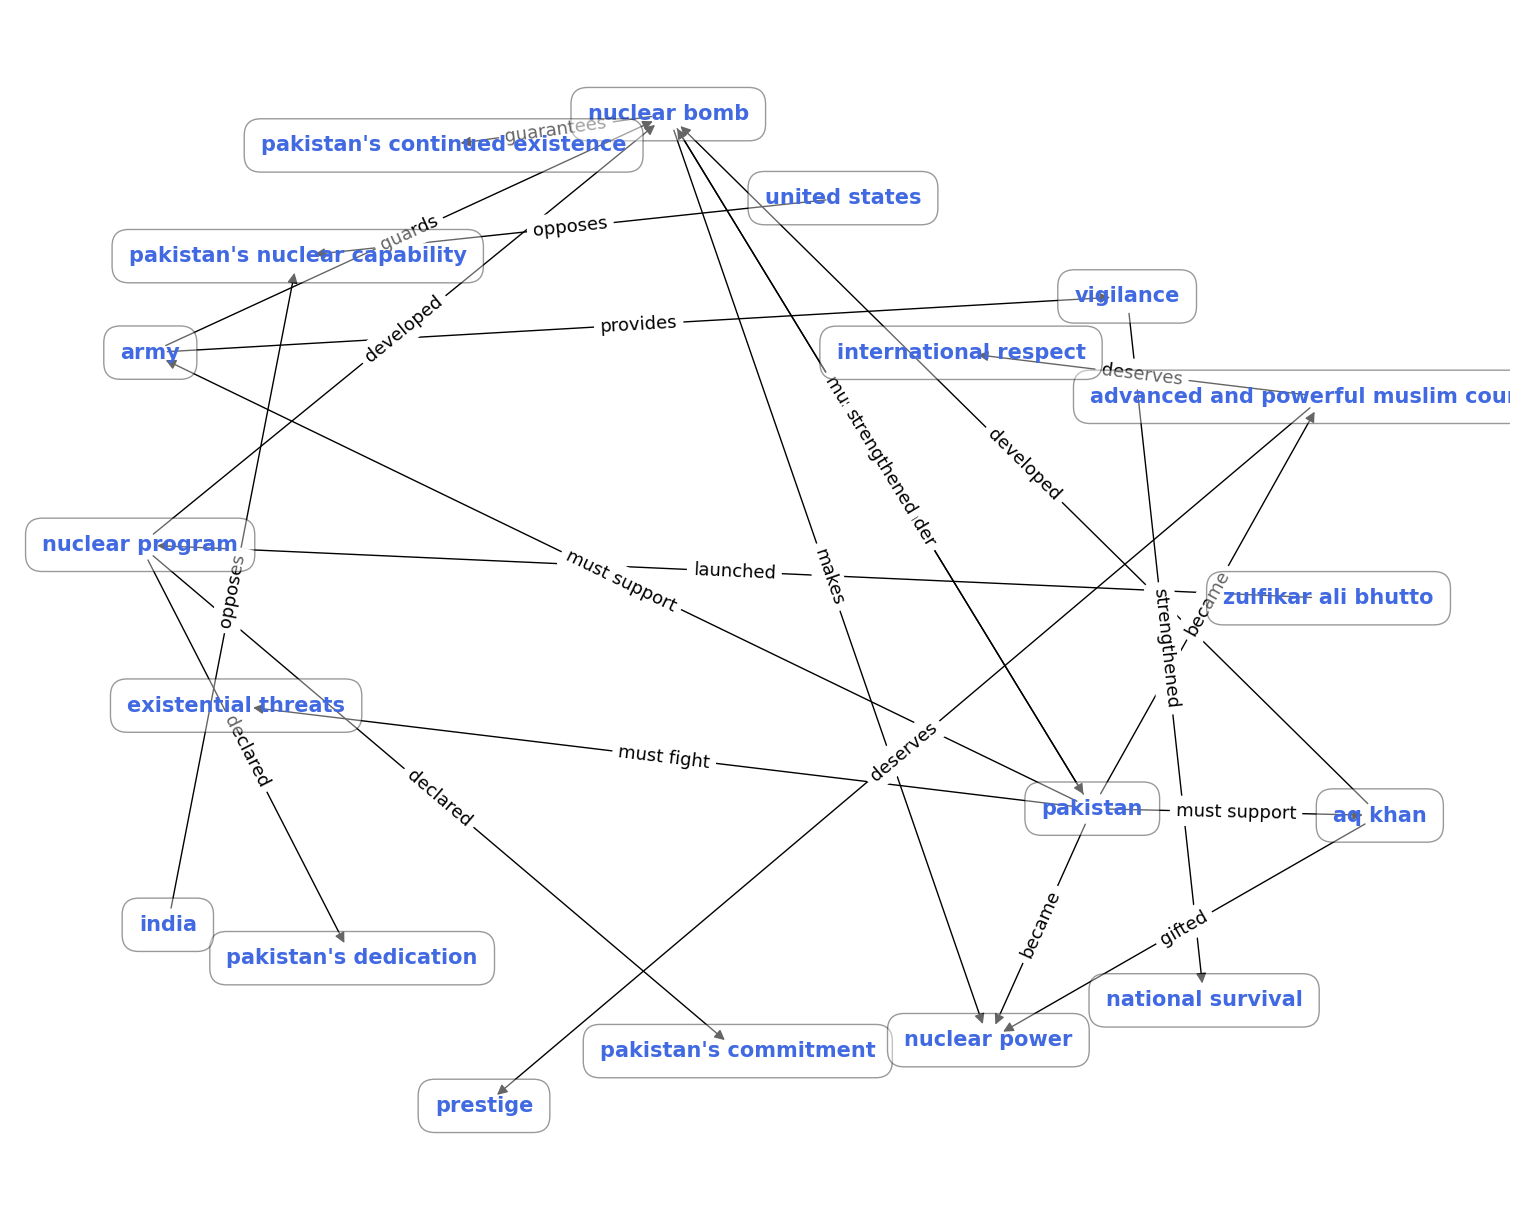

In [7]:
cmap = nx.DiGraph()

for triple in correctTriples:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicate=triple[1])
    #print(triple)

print("Nodes:",len(cmap.nodes))
print("Edges:",len(cmap.edges))
for e in cmap.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicate')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [8]:
synonyms = []

my_file = open(".\old_dictionary_V2a.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [9]:
#new

causeffect = [] #without duplicates
causalSentences = [] #with duplicates

lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        tok = token
        lemma = lemma_function.lemmatize(token)
        stem = ps.stem(token)
        
    for synonym in synonyms:
        if synonym == lemma or synonym == tok or synonym == stem:
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            break
    

print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

# for causalSentence in causalSentences:
#     print(causalSentence)

16
16
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
aq khan gifted nuclear power. (aq khan, gifted, nuclear 

# Plot the Causal Graph.

Nodes: 13
Edges: 13
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
nuclear program , {'predicade': 'developed'} , nuclear bomb
aq khan , {'predicade': 'developed'} , nuclear bomb
aq khan , {'predicade': 'gifted'} , nuclear power
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


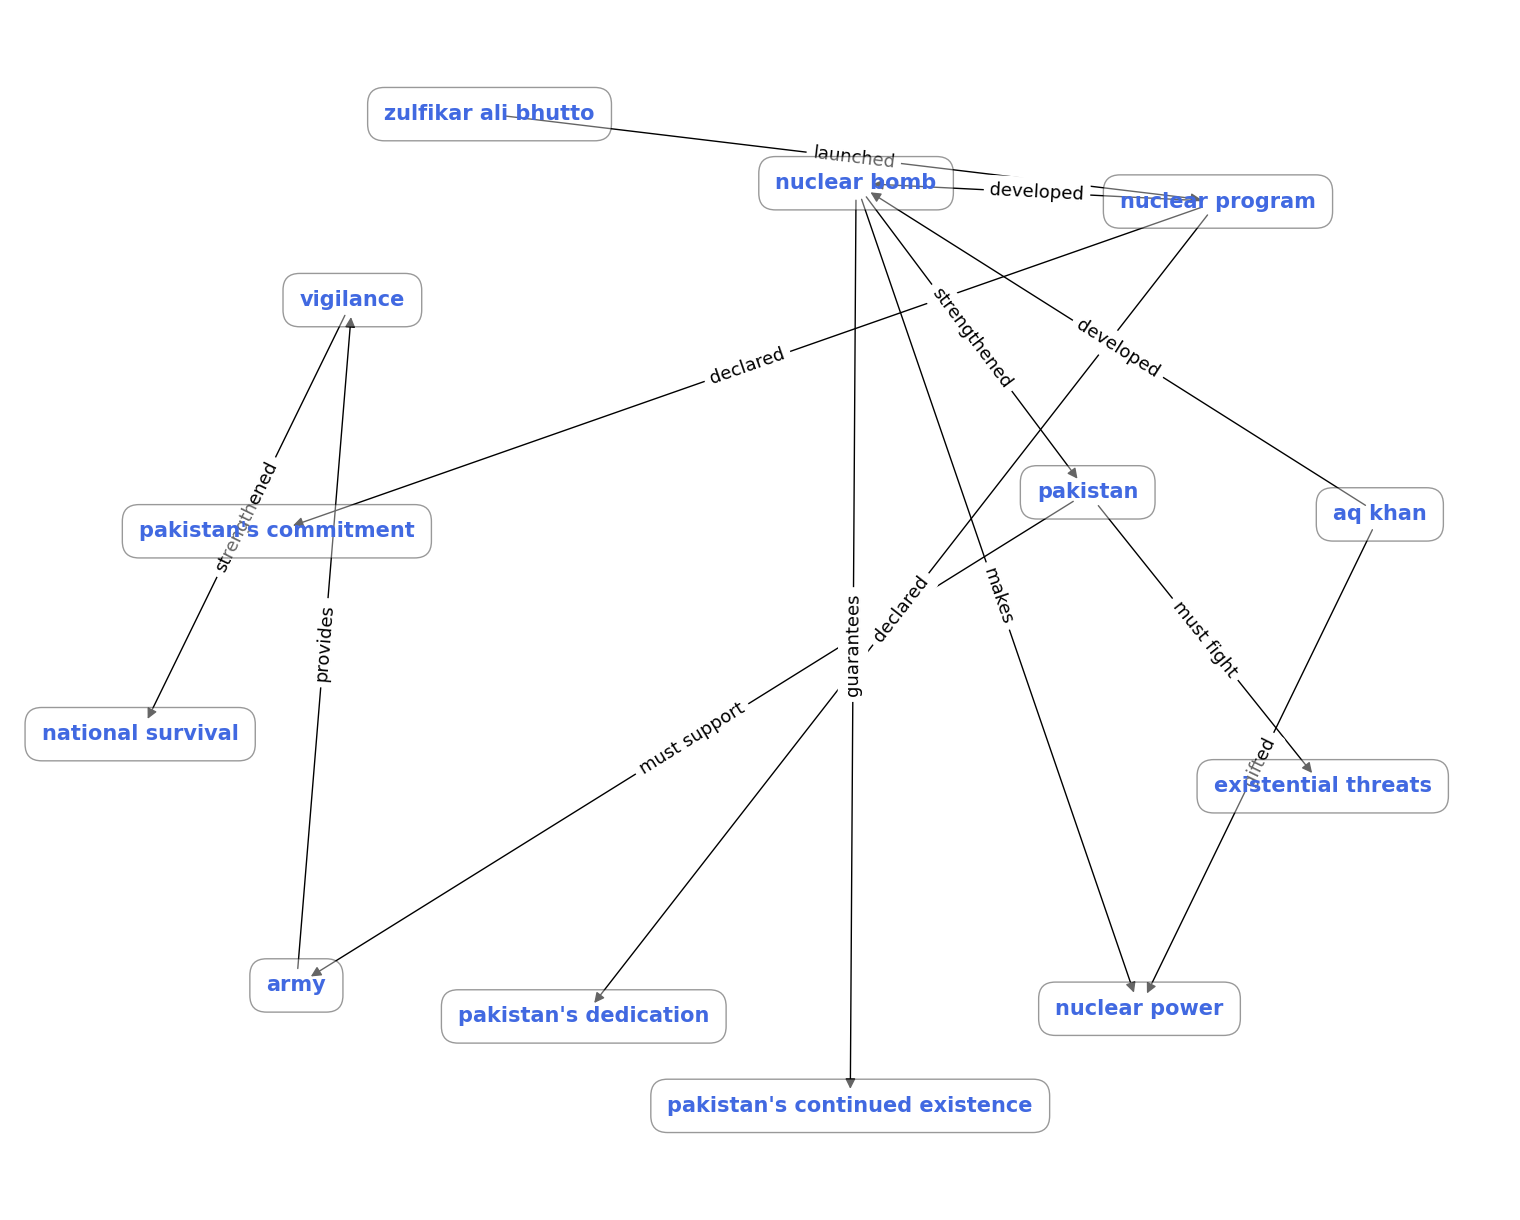

In [10]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()
dagCauseSents = []
dagCauseVerbs = []

for ce,se in zip(causeffect,causalSentences):
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
#     dagCauseTriples.append(ce)
#     dagCauseSents.append(se)
#     dagCauseVerbs.append(str(ce[1]))
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
#         dagCauseTriples.remove(ce)
#         dagCauseSents.remove(se)  
#         dagCauseVerbs.remove(str(ce[1]))
    else:
        for dummy,dummy1,dummy2 in zip(dagCauseTriples,dagCauseSents,dagCauseVerbs):
            if str(dummy[0]) == s and str(dummy[2]) == d:
                dagCauseTriples.remove(dummy)
                dagCauseSents.remove(dummy1)  
                dagCauseVerbs.remove(dummy2)
                break;
        dagCauseTriples.append(ce)
        dagCauseSents.append(se)
        dagCauseVerbs.append(str(ce[1]))

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Make Causal Graph Fully Connected (Change value of 'sentence' and 'ce' tuple)

# Print DAG Causal Triples along with Sentences and Verbs

In [11]:
print(len(dagCauseTriples))
print(len(dagCauseSents))
print(len(dagCauseVerbs))

for causalSentence, causalTriple, causalVerb  in zip(dagCauseSents, dagCauseTriples, dagCauseVerbs):
    print(causalSentence, causalTriple, causalVerb)

# for causalTriple in dagCauseTriples:
#     print(causalTriple)

13
13
13
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program) launched
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment) declared
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication) declared
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb) developed
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan) strengthened
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power) makes
pakistan must fight off existential threats. (pakistan, must fight, existential threats) must fight
pakistan must support army and aq khan. (pakistan, must support, army) must support
aq khan gifted nuclear power. (aq khan, gifted, nuclear power) gifted
army provides vigilance. (army, provides, vigilance) provides
vigilance strengthened national survival. (vigilance, strengt

# Plot the Causal Graph on using Pyvis "Causal Graph.html" file 

In [12]:
#nt = Network("500px", "1000px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Causal Graph')

for dm in dagCauseTriples:
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]), weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Causal Graph.html")

# Causal Verbs Polarity (Whole) 

### [Pre-trained] Hugging face twitter-XLM-roBERTa-base

In [13]:
allen = []
for sent in dagCauseVerbs:
    encoded_input = tokenizer(str(sent), return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    if scores[0] > scores[1] and scores[0] > scores[2]:
        score = scores[0] * -1
        score = round(score,3)
        allen.append(score)
    elif scores[2] > scores[1] and scores[2] > scores[0]:
        scores[2] = round(scores[2],3)
        allen.append(scores[2])
    else:
        # allen.append(scores[1])
        allen.append(0)

for causalSentence, polarity  in zip(dagCauseVerbs, allen):
    print(causalSentence, polarity)

launched 0
declared 0
declared 0
developed 0
strengthened 0.379
makes 0
must fight -0.465
must support 0.419
gifted 0.373
provides 0
strengthened 0.379
guarantees 0
developed 0


### [Afinn]

In [14]:
afinn = []
for sent in dagCauseVerbs:
    #print(str(sent))
    score = afn.score(str(sent))
    # print(score)
    if score < -5:
        score = -5
    elif score > 5:
        score = 5
    score = score/5
    score = round(score,3)
    afinn.append(score)
    # if score > 0:
    #     #print('positive')
    #     afinn.append(1)
    # elif score < 0:
    #     #print('negative')
    #     afinn.append(-1)
    # else:
    #     #print('neutral')
    #     afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseVerbs, afinn):
    print(causalSentence, polarity)

launched 0.2
declared 0.0
declared 0.0
developed 0.0
strengthened 0.4
makes 0.0
must fight -0.2
must support 0.4
gifted 0.0
provides 0.0
strengthened 0.4
guarantees 0.0
developed 0.0


### [Vader]

In [15]:
vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# def vader_analysis(compound):
#     if compound >= 0.05:
#         vader.append(1)
#         return 'Positive'
#     elif compound <= -0.05 :
#         vader.append(-1)
#         return 'Negative'
#     elif  compound > -0.05 and compound < 0.05:
#         vader.append(0)
#         return 'Neutral'
    
for sent in dagCauseVerbs:
    compound = vadersentimentanalysis(str(sent))
    compound = round(compound,3)
    compound = round(compound,3)
    vader.append(compound)
    
for causalSentence, polarity  in zip(dagCauseVerbs, vader):
    print(causalSentence, polarity)

launched 0.128
declared 0.0
declared 0.0
developed 0.0
strengthened 0.421
makes 0.0
must fight -0.382
must support 0.402
gifted 0.0
provides 0.0
strengthened 0.421
guarantees 0.0
developed 0.0


### [SentiStrength]

In [16]:
sentiStrength = []

for sent in dagCauseVerbs:
    result = senti.getSentiment(str(sent), score='scale')
    result = result[0]/4
    result = round(result,3)
    sentiStrength.append(result)
    # if result[0] > 0:
    #     sentiStrength.append(1)
    # elif result[0] < 0:
    #     sentiStrength.append(-1)
    # else:
    #     sentiStrength.append(0)
    
for causalSentence, polarity  in zip(dagCauseVerbs, sentiStrength):
    print(causalSentence, polarity)

launched 0.0
declared 0.0
declared 0.0
developed 0.0
strengthened 0.0
makes 0.0
must fight -0.5
must support 0.25
gifted 0.0
provides 0.0
strengthened 0.0
guarantees 0.0
developed 0.0


### Data Frame (Causal Verbs Whole)

In [17]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df_CVW = pd.DataFrame(list(zip(dagCauseVerbs, allen, afinn, vader,sentiStrength)), columns =['Causal Verb', 'HuggingFace','Afinn','Vader','SentiStrength'])
# df2["Weight"] = round(df2.sum(axis=1)/4,3)

df_CVW["Weight"] = df_CVW.sum(axis=1)

for i in df_CVW.index:
    count = 0
#     print(df2["Afinn"][i])
    if df_CVW["HuggingFace"][i] != 0:
        count = count + 1
    if df_CVW["Afinn"][i] != 0:
        count = count + 1
    if df_CVW["Vader"][i] != 0:
        count = count + 1
    if df_CVW["SentiStrength"][i] != 0:
        count = count + 1
    if count == 0:
        count = 1
    df_CVW["Weight"][i] = round(df_CVW["Weight"][i]/count,3)

sentPolarity = []
VerbsWeight_sentLevel = []

for index, row in df_CVW.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    VerbsWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight >= -1 and weight < -0.6:
        sentPolarity.append('Strong Negative') 
    elif weight >= -0.6 and weight < -0.3:
        sentPolarity.append('Moderate Negative')
    elif weight >= -0.3 and weight < 0:
        sentPolarity.append('Weak Negative')
    elif weight == 0:
        sentPolarity.append('Neutral')
    elif weight <= 1 and weight > 0.6:
        sentPolarity.append('Strong Positive')
    elif weight <= 0.6 and weight > 0.3:
        sentPolarity.append('Moderate Positive')
    elif weight <= 0.3 and weight > 0:
        sentPolarity.append('Weak Positive')

df_CVW["Polarity"] = sentPolarity
df_CVW.style

c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
c:\Users\sjsheikh\AppData\Local\anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Causal Verb,HuggingFace,Afinn,Vader,SentiStrength,Weight,Polarity
0,launched,0.000000,0.200000,0.128000,0.000000,0.164000,Weak Positive
1,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
2,declared,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
3,developed,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
4,strengthened,0.379000,0.400000,0.421000,0.000000,0.400000,Moderate Positive
5,makes,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral
6,must fight,-0.465000,-0.200000,-0.382000,-0.500000,-0.387000,Moderate Negative
7,must support,0.419000,0.400000,0.402000,0.250000,0.368000,Moderate Positive
8,gifted,0.373000,0.000000,0.000000,0.000000,0.373000,Moderate Positive
9,provides,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral


# Get weights and polarities from selected method(s) for CPT computation 

In [18]:
weights = df_CVW["Weight"].tolist()
polarities = df_CVW["Polarity"].tolist()

print(weights)
print(polarities)
bench_check = False

[0.164, 0.0, 0.0, 0.0, 0.4, 0.0, -0.387, 0.368, 0.373, 0.0, 0.4, 0.0, 0.0]
['Weak Positive', 'Neutral', 'Neutral', 'Neutral', 'Moderate Positive', 'Neutral', 'Moderate Negative', 'Moderate Positive', 'Moderate Positive', 'Neutral', 'Moderate Positive', 'Neutral', 'Neutral']


# Plot the Polarized/Weighted Causal Graph.

Nodes: 13
Edges: 13
zulfikar ali bhutto , {'predicate': 'Weak Positive'} , nuclear program
nuclear program , {'predicate': 'Neutral'} , pakistan's commitment
nuclear program , {'predicate': 'Neutral'} , pakistan's dedication
nuclear program , {'predicate': 'Neutral'} , nuclear bomb
aq khan , {'predicate': 'Neutral'} , nuclear bomb
aq khan , {'predicate': 'Moderate Positive'} , nuclear power
nuclear bomb , {'predicate': 'Moderate Positive'} , pakistan
nuclear bomb , {'predicate': 'Neutral'} , nuclear power
nuclear bomb , {'predicate': 'Neutral'} , pakistan's continued existence
pakistan , {'predicate': 'Moderate Negative'} , existential threats
pakistan , {'predicate': 'Moderate Positive'} , army
army , {'predicate': 'Neutral'} , vigilance
vigilance , {'predicate': 'Moderate Positive'} , national survival


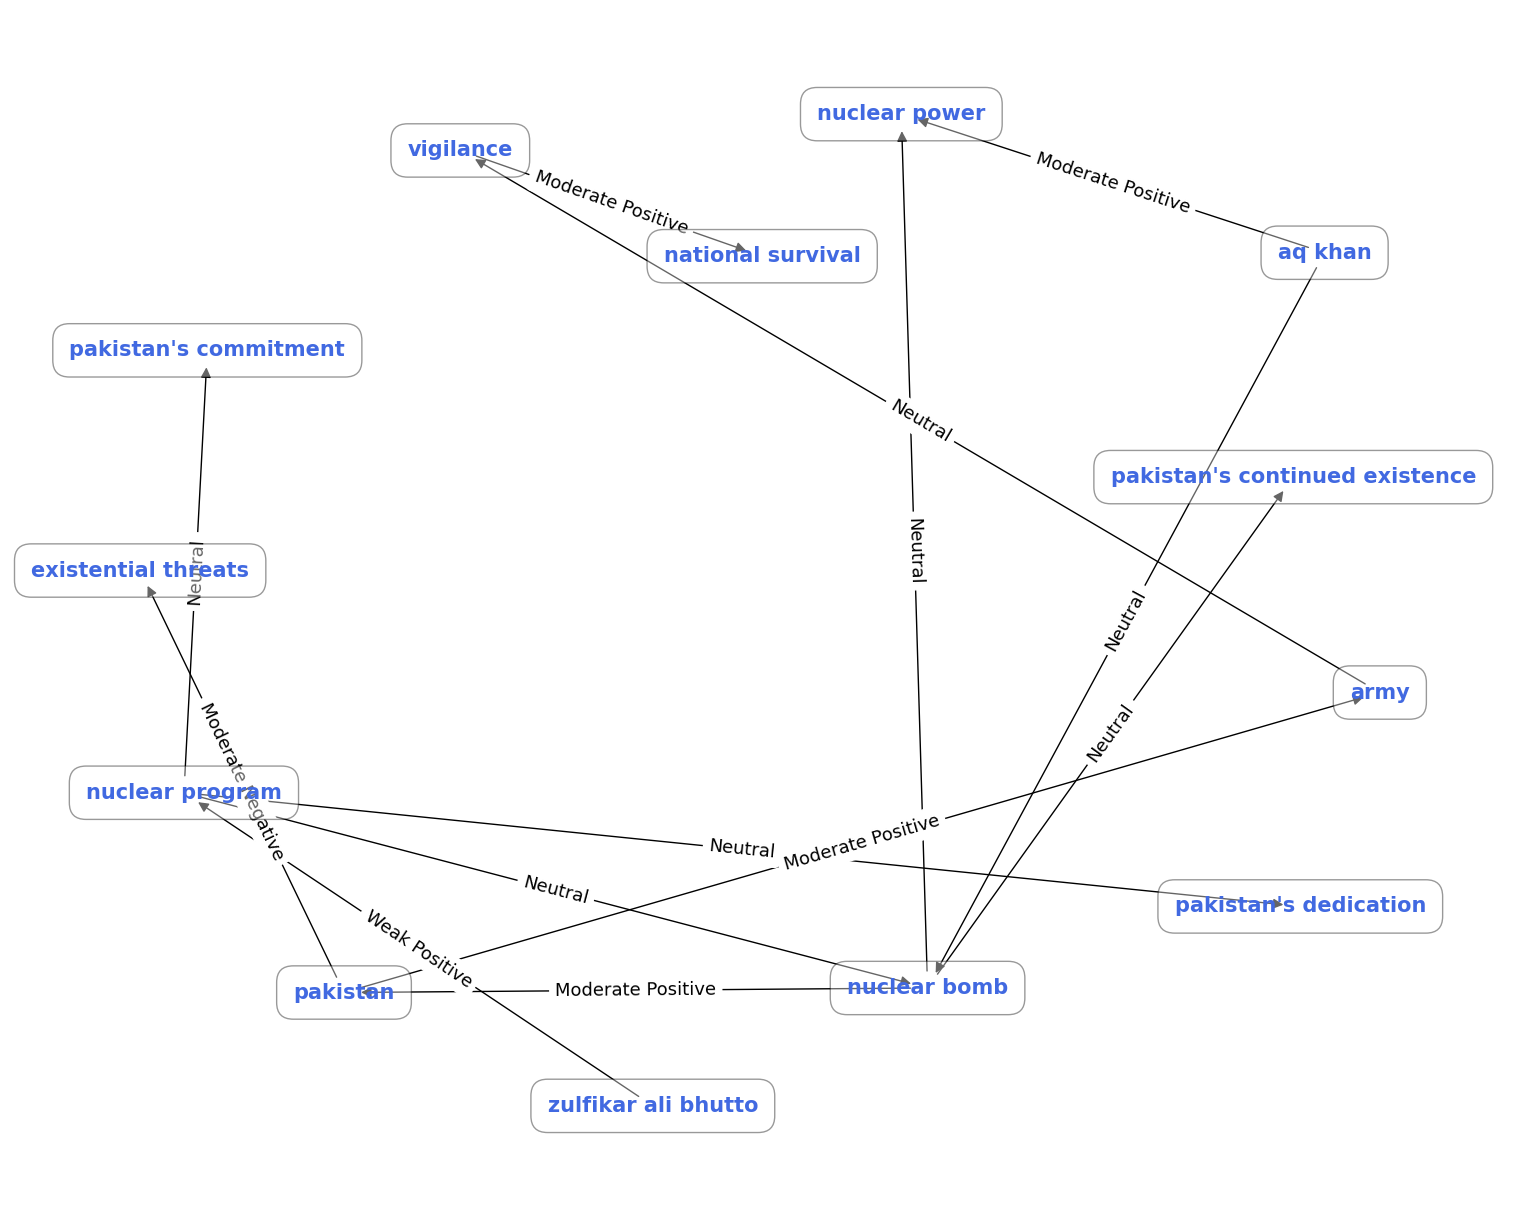

In [19]:
# dagCauseWeights = []
cwg = nx.DiGraph()

for ce,p in zip(dagCauseTriples, polarities):
    s = str(ce[0])    
    d = str(ce[2])
#     w = GetCAstLogicStrength(p[0])
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=p)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))

for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Compute CPs using CAST Logic

In [20]:
def FromTruthTable(i,inputs):
    count = 0

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
                return (a)
            count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c)
                        return t
                    count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        if i == count:
                            t = (a,b,c,d)
                            return t
                        count = count+1

    elif inputs==5:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            if i == count:
                                t = (a,b,c,d,e)
                                return t
                            count = count+1
                            
    elif inputs==6:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                for c in range(1, -1, -1):
                    for d in range(1, -1, -1):
                        for e in range(1,-1,-1):
                            for f in range(1,-1,-1):
                                if i == count:
                                    t = (a,b,c,d,e,f)
                                    return t
                                count = count+1
                                
def GetCAstLogicStrength(polarity):
    if polarity == "Strong Negative":
        return -0.9
    elif polarity == "Moderate Negative":
        return -0.6
    elif polarity == "Mild Negative":
        return -0.6
    elif polarity == "Weak Negative":
        return -0.3
    elif polarity == "Neutral":
        return 0.1
    elif polarity == "Weak Positive":
        return 0.3
    elif polarity == "Mild Positive":
        return 0.6
    elif polarity == "Moderate Positive":
        return 0.6
    elif polarity == "Strong Positive":
        return 0.9                                

class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
# cpts=[]
PDs = []
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                totalCols = 2 ** num_parents
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "predicate":
                                #polarity = eattr
                                polarity = GetCAstLogicStrength(eattr)
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            if CP == 0:
                CP = 0.01
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
            pds = []
            pds.append(round(CP, 3))
            pds.append(round((1 - CP), 3))
            PDs.append(pds)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:zulfikar ali bhutto
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:nuclear program
['True', 'False']
Number of Parents:1
Names of Parents:['zulfikar ali bhutto']
totalCols:2
j: 0
From Dummy: 1
Parent: zulfikar ali bhutto
Polarity: 0.3
p: 0
j: 1
From Dummy: 0
Parent: zulfikar ali bhutto
Polarity: 0.3
p: 0
New Polarity: 0
CPT:[0.37, 0.63, 0.1, 0.9]
CPT from Network:
[0.37, 0.63, 0.1, 0.9]
********************************************************************
Handle:2
Node:pakistan's commitment
['True', 'False']
Number of Parents:1
Names of Parents:['nuclear program']
totalCols:2
j: 0
From Dummy: 1
Parent: nuclear program
Polarity: 0.1
p: 0
j: 1
From Dummy: 0
Parent: nuclear program
Polarity: 0.1
p: 0
New Polarity: 0
CPT:[0.19, 0.81, 0.1, 0.9]
CPT from Network:
[0.19, 0.81, 0.1, 0.9]
********************************************************************
Handle:3
